In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import cv2 as cv
from sklearn.metrics import mean_squared_error
from scipy import ndimage
from skimage import data
from skimage.util import invert
import time

In [2]:
def get_dst_transform_img(og): #og is a numpy array of original image
   cords=[]
   zeros_loc = np.where(og == 0 )
   zeros = np.asarray(zeros_loc).T # coords of all zeros in og

   for i in range(zeros.shape[0]):
      if(zeros[i,0]-1>=0 and zeros[i,1]-1>=0 and zeros[i,0]+1<=og.shape[0]-1 and zeros[i,1]+1<=og.shape[1]-1):
        if(og[zeros[i,0],zeros[i,1]-1]==1 or og[zeros[i,0]-1,zeros[i,1]-1]==1 or og[zeros[i,0]-1,zeros[i,1]]==1 or 
        og[zeros[i,0]+1,zeros[i,1]-1]==1 or og[zeros[i,0]-1,zeros[i,1]+1]==1 or og[zeros[i,0],zeros[i,1]+1]==1 or 
        og[zeros[i,0]+1,zeros[i,1]]==1 or og[zeros[i,0]+1,zeros[i,1]+1]==1):
            cords.append([zeros[i,0],zeros[i,1]])


  
   ones_loc = np.where(og == 1)
   ones = np.asarray(ones_loc).T # coords of all ones in og

   a = -2 * np.dot(ones, np.asarray(cords).T) 
   b = np.sum(np.square(cords), axis=1) 
   c = np.sum(np.square(ones), axis=1)[:,np.newaxis]
   dists = a + b + c
   dists = np.sqrt(dists.min(axis=1)) # min dist of each zero pixel to one pixel
   x = og.shape[0]
   y = og.shape[1]
   dist_transform = np.ones((x,y))
   dist_transform[ones[:,0], ones[:,1]] = dists

   return dist_transform


In [3]:
img=cv.imread(r'C:\Users\dorij\OneDrive\Desktop\Distance_transform(Dorijan_Osmakcic)\brain.jpg')
x=np.arange(0.0,1.0,0.1)
polje=[]

In [4]:
for i in  (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1):
   img_75 = cv.resize(img, None, fx =i, fy =i)
   gray = cv.cvtColor(img_75, cv.COLOR_BGR2GRAY)

   grayreal=np.where(gray>200,1,0)

   threshdata=np.asarray(grayreal,dtype='uint8')

   start1=time.time()*1000
   arr=ndimage.distance_transform_edt(threshdata)
   end1=time.time()*1000
   print((end1-start1),'ms of Scipy')
   



   start2=time.time()*1000
   dstmy=get_dst_transform_img(threshdata)
   end2=time.time()*1000
   print((end2-start2),'ms of my DistTransform')
   


   start3=time.time()*1000
   distcv = cv.distanceTransform(threshdata, cv.DIST_L2, 5)
   end3=time.time()*1000
   print((end3-start3),'ms of OpenCV')
   
   polje.append([(end1-start1),(end2-start2),(end3-start3)])


print(polje)


1.00048828125 ms of Scipy
301.7666015625 ms of my DistTransform
3.010009765625 ms of OpenCV
2.986572265625 ms of Scipy
1263.725830078125 ms of my DistTransform
1.00146484375 ms of OpenCV
7.001220703125 ms of Scipy
3128.382080078125 ms of my DistTransform
0.990478515625 ms of OpenCV
13.00732421875 ms of Scipy
6649.214599609375 ms of my DistTransform
0.980224609375 ms of OpenCV
22.022705078125 ms of Scipy
11735.252197265625 ms of my DistTransform
0.9853515625 ms of OpenCV
29.003662109375 ms of Scipy
20006.859375 ms of my DistTransform
14.00048828125 ms of OpenCV
42.00927734375 ms of Scipy
59039.99560546875 ms of my DistTransform
33.008056640625 ms of OpenCV
70.087890625 ms of Scipy
156371.28564453125 ms of my DistTransform
38.008544921875 ms of OpenCV
82.0185546875 ms of Scipy
398282.6474609375 ms of my DistTransform
32.0068359375 ms of OpenCV
99.01953125 ms of Scipy
754197.93359375 ms of my DistTransform
42.071533203125 ms of OpenCV
[[1.00048828125, 301.7666015625, 3.010009765625], [2.9

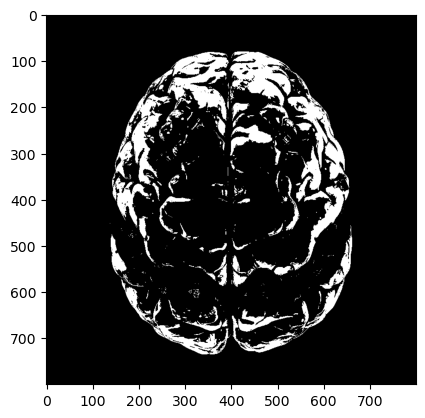

In [5]:
ls=np.array(polje)

plt.figure(6)
plt.imshow(threshdata,cmap='gray')
plt.show()

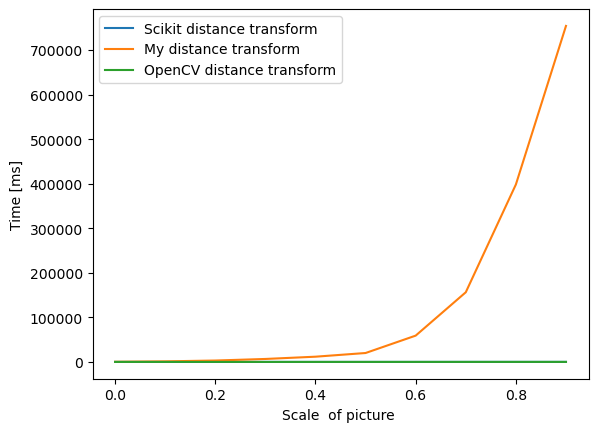

In [6]:
plt.plot(x, ls[:,0], label = "Scipy")
plt.plot(x,ls[:,1] , label = "With numpy")
plt.plot(x, ls[:,2], label = "OpenCV")
plt.xlabel('Scale  of picture ')
plt.ylabel('Time [ms]')

plt.legend(["Scikit distance transform","My distance transform","OpenCV distance transform"])
plt.show()


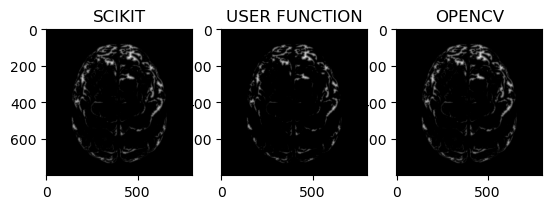

In [7]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(arr,cmap = 'gray')
axarr[0].set_title('SCIKIT')
axarr[1].imshow(dstmy,cmap = 'gray')
axarr[1].set_title('USER FUNCTION')
axarr[2].imshow(distcv,cmap = 'gray')
axarr[2].set_title('OPENCV')

plt.show()